In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [375]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [377]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


1)mean is close to median
2)the data looks like has no Oultiers
No skew in the data

<AxesSubplot:title={'center':'Chirps/Second vs Ground Temperature'}, xlabel='Chirps/Second', ylabel='Ground Temperature'>

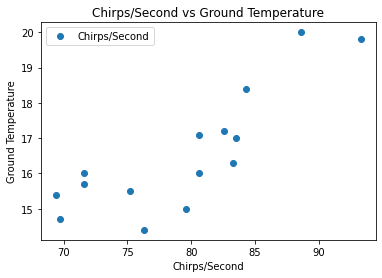

In [378]:
df.plot(x='Ground Temperature',y='Chirps/Second',style='o',title='Chirps/Second vs Ground Temperature'
       ,xlabel='Chirps/Second',ylabel='Ground Temperature')

In [379]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


*  has a good correlation in the data

*  can see a linear trend over the data

In [380]:
X=df.iloc[:,1:2].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [381]:
y

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [382]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [383]:
regressor.intercept_

2.3170268615320815

In [384]:
regressor.coef_

array([0.178373])

In [385]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'actual Ground Temperature':y_test,'predicted Ground Temperature':y_pred})

,actual Ground Temperature,predicted Ground Temperature
0,19.8,18.959228
1,17.0,17.211172
2,15.5,15.730676
3,18.4,17.353871


In [386]:
from sklearn import metrics
print("",metrics.r2_score(y_test,y_pred)) 

 0.814315346734819


In [387]:
print(' If the ground temperature reached 95, then at what approximate rate would be ',regressor.predict([[95]]))

 If the ground temperature reached 95, then at what approximate rate would be  [19.26246184]


In [388]:
# m*x+b
# x=(y-b)/m
print((18-regressor.intercept_)/regressor.coef_[0])

87.92234899159453


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [389]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


<AxesSubplot:title={'center':'Brain vs Body'}, xlabel='Brain', ylabel='Body'>

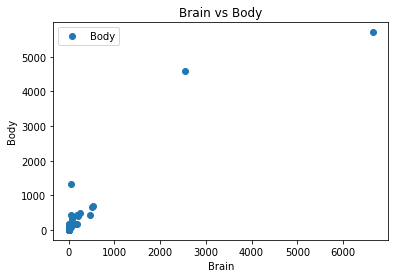

In [390]:
df.plot(x='Brain',y='Body',style='o',title='Brain vs Body',xlabel='Brain',ylabel='Body')

* can see a linear trend 
* but the data seems to have outliers.but some mammals are big in size so they have a big brain 

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [392]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [393]:
q3=np.quantile(df['Brain'],0.75)
q1=np.quantile(df['Brain'],0.25)
iqr=q3-q1
(q3+1.5)*iqr

2365.96325625

In [394]:
#removing the  ouliers
df2=df[df.Brain < iqr]
df2.count()

Brain    46
Body     46
dtype: int64

<AxesSubplot:title={'center':'Brain vs Body'}, xlabel='Brain', ylabel='Body'>

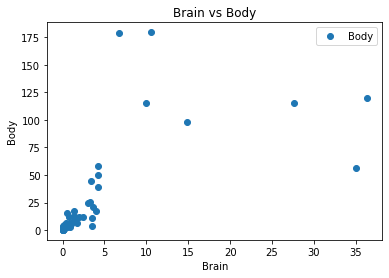

In [395]:
#plot without ouliers
df2.plot(x='Brain',y='Body',style='o',title='Brain vs Body',xlabel='Brain',ylabel='Body')

In [396]:
df2.corr()

,Brain,Body
Brain,1.000000,0.637365
Body,0.637365,1.000000


In [397]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


<AxesSubplot:title={'center':'Brain vs Body'}, xlabel='Brain', ylabel='Body'>

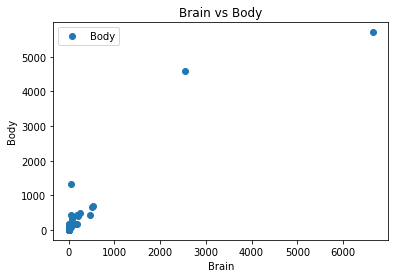

In [398]:
df.plot(x='Brain',y='Body',style='o',title='Brain vs Body',xlabel='Brain',ylabel='Body')

In [399]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [400]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [401]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [402]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'actual Brain':y_test,'predicted Brain':y_pred})

,actual Brain,predicted Brain
0,12.3,74.106748
1,25.0,76.282182
2,169.0,228.079141
3,10.8,76.765612
4,12.1,75.798752
5,58.0,77.432745
6,1320.0,133.326899
7,490.0,315.096506
8,115.0,100.124940
9,680.0,584.850338


In [403]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred)) 

0.2388114001659274


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [404]:
df = pd.read_fwf("salary.txt", header=None,names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [405]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


<AxesSubplot:xlabel='Year', ylabel='Salary'>

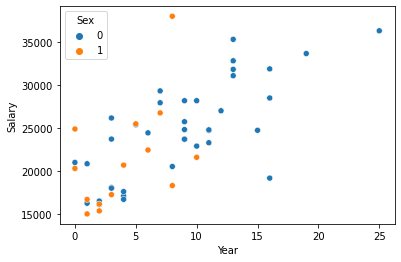

In [406]:
sns.scatterplot(data=df, x='Year', y='Salary', hue='Sex')

In [407]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


<AxesSubplot:xlabel='Degree', ylabel='Salary'>

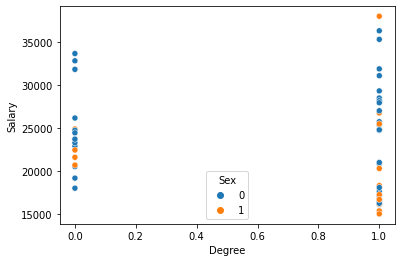

In [408]:
sns.scatterplot(data=df, x='Degree', y='Salary', hue='Sex')

In [409]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


<AxesSubplot:xlabel='Rank', ylabel='Salary'>

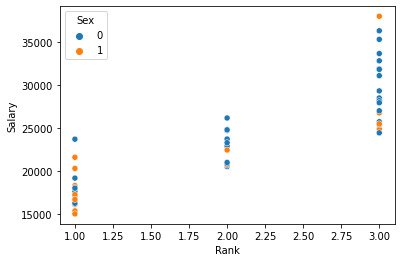

In [410]:
sns.scatterplot(data=df, x='Rank', y='Salary', hue='Sex')

In [411]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


<AxesSubplot:xlabel='YSdeg', ylabel='Salary'>

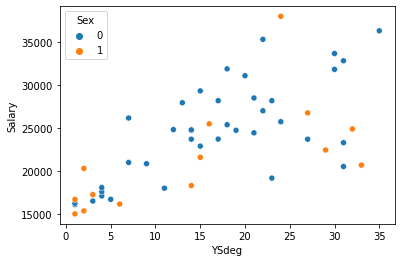

In [412]:
sns.scatterplot(data=df, x='YSdeg', y='Salary', hue='Sex')

In [413]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


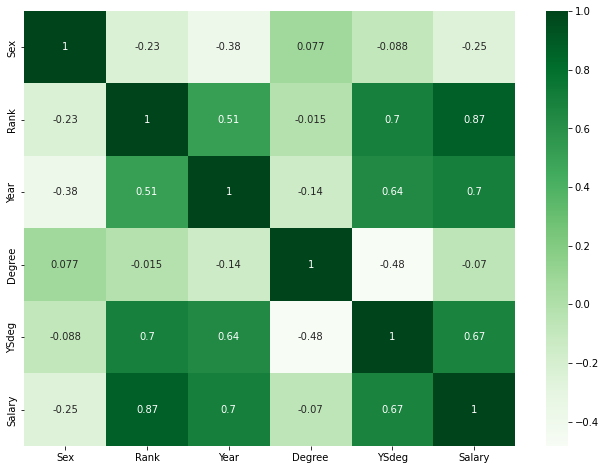

In [414]:
from matplotlib import pyplot as plt
corr=df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [416]:
X=df[['Sex','Rank','Year','YSdeg']].values
y=df['Salary'].values

In [417]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [418]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train,y_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [419]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [420]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'actual Salary':y_test,'predicted Salary':y_pred})

,actual Salary,predicted Salary
0,18000,16180.332453
1,31909,32845.634809
2,28516,32612.552072
3,24900,24614.021022
4,17250,17598.865127
5,17095,17220.496738
6,28200,29449.197091
7,17600,17220.496738
8,20300,16187.645674
9,20850,20721.713168


In [421]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred)) 

0.8673753721711169


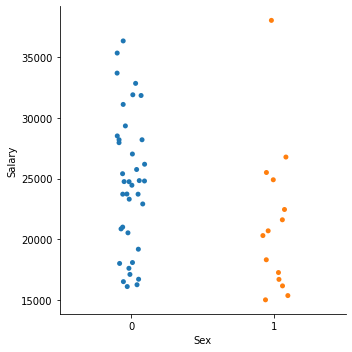

In [422]:
sns.catplot(x="Sex", y="Salary",data=df)

In [431]:
pd.DataFrame({'male salary based on ranks':[regressor.predict([[0,i,15,15]]) for i in range(3)],'female salary based on ranks':[regressor.predict([[1,i,15,15]]) for i in range(3)]})

,male salary based on ranks,female salary based on ranks
0,[16446.608908965303],[17243.587618991354]
1,[21825.21026560087],[22622.18897562692]
2,[27203.811622236433],[28000.790332262484]


In [424]:
pd.DataFrame({'male salary based on years':[regressor.predict([[0,2,i,15]]) for i in range(5,26,5)],'female salary based on years':[regressor.predict([[1,2,i,15]]) for i in range(5,26,5)]},index=[i for i in range(5,26,5)])

,male salary based on years,female salary based on years
5,[22240.765960214492],[23037.744670240543]
10,[24722.288791225463],[25519.267501251514]
15,[27203.811622236433],[28000.790332262484]
20,[29685.334453247404],[30482.313163273455]
25,[32166.857284258374],[32963.835994284425]


In [425]:
pd.DataFrame({'male salary based on YSdeg':[regressor.predict([[0,2,15,i]]) for i in range(5,26,5)],'female salary based on YSdeg':[regressor.predict([[1,2,15,i]]) for i in range(5,26,5)]},index=[i for i in range(5,26,5)])

,male salary based on YSdeg,female salary based on YSdeg
5,[27980.75407735963],[28777.73278738568]
10,[27592.282849798034],[28389.261559824085]
15,[27203.811622236433],[28000.790332262484]
20,[26815.340394674833],[27612.319104700884]
25,[26426.869167113233],[27223.847877139284]
